# Lab Two - pi(ka)chu

## Grunduppgift  

a) Läs in datan och spara i lämplig datastruktur.

In [6]:
import numpy as np

path_datapoints = "/home/albot/coding/repos/python-programming-ANDERS-SANDERLI/Data/datapoints.txt"

with open(path_datapoints, "r") as dp:
    temp_list = []
    lines = dp.readlines()
    for row in lines[1:]:
        row = row.strip().split(", ")
        temp_list.append(row)
        datapoints_arr = np.array(temp_list, dtype=float)

print(datapoints_arr[:5])

[[21.9593845  31.23956701  0.        ]
 [23.63591632 36.46821491  1.        ]
 [17.71405642 31.44170391  0.        ]
 [21.78020032 33.21339776  1.        ]
 [25.20630553 36.55881615  1.        ]]


b) Plotta alla punkterna (varje klass får en färg) i samma fönster. 

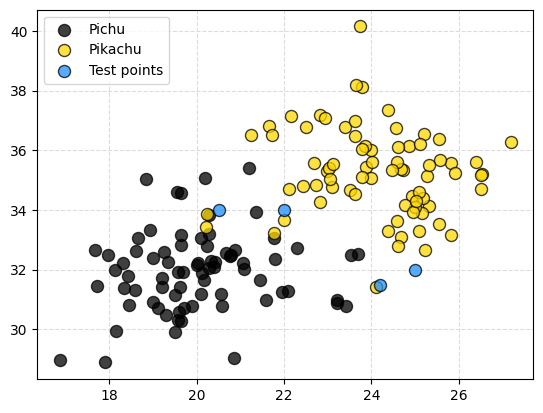

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_datapoints(T, D):

    # this trick with scatter came from Copilot, highlighting the code and prompting: "I want the legend to only show the three alternatives, not each dot."
    plt.scatter([], [], color="black", label="Pichu", edgecolors="black", linewidth=1, s=75, alpha=0.75)
    plt.scatter([], [], color="gold", label="Pikachu", edgecolors="black", linewidth=1, s=75, alpha=0.75)
    plt.scatter([], [], color="dodgerblue", label="Test points", edgecolors="black", linewidth=1, s=75, alpha=0.75)

    for x, y in T:
        plt.scatter(x, y, color="dodgerblue", zorder=4, edgecolors="black", linewidth=1, s=75, alpha=0.75)

    for x, y, z in D:
        if z == 0:
            plt.scatter(x, y, color="black", zorder=2, edgecolors="black", linewidth=1, s=75, alpha=0.75)
        else:
            plt.scatter(x, y, color="gold", zorder=3, edgecolors="black", linewidth=1, s=75, alpha=0.75)

    plt.legend(loc="upper left")
    plt.grid(True, color="gainsboro", linestyle="dashed", zorder=1)

plot_datapoints(testpoints_arr, datapoints_arr)

c) Läs in testpunkterna.

In [7]:
import numpy as np

path_testpoints = "/home/albot/coding/repos/python-programming-ANDERS-SANDERLI/Data/testpoints.txt"

with open(path_testpoints, "r") as tp:
    temp_list = []
    lines = tp.readlines()
    for row in lines[1:]:
        row = row[3:].strip().split(") ")
        for pair in row:
            pair = pair.strip("()").split(", ")
            temp_list.append(pair)
            testpoints_arr = np.array(temp_list, dtype=float)

print(testpoints_arr)

[[25.  32. ]
 [24.2 31.5]
 [22.  34. ]
 [20.5 34. ]]


d) Beräkna avstånd mellan testpunkt och träningspunkter. 

In [8]:
import numpy as np


def Euclidean_distance_2D(P, Q):
    distance = np.sqrt((np.square(P[0] - Q[0])) + (np.square(P[1] - Q[1])))
    return float(distance)


def distance_listing(T, D):
    distance_list_2D = []
    for p in T:                                                     # Om T bara innehåller ett p, blir det problem senare? T ex vid user input
        distance_list = []
        for q in D:
            distance = Euclidean_distance_2D(p, q[:2])
            distance_list.append(distance)                          # 1D-lista
        distance_list_2D.append(distance_list)                      # 2D-lista - om len(T) == 1, då borde väl inte klassificering blir ngt problem?
    return distance_list_2D

e) Klassificera som antingen Pichu eller Pikachu. 

In [152]:
def nearest_neighbour(T, D):            # Ludwig visade något om att skriva testpoints = testpoints. Går det att göra för att ta emot k redan här?
    pokémon_dict = {0: "Pichu", 1: "Pikachu"}
    distance_list_2D = distance_listing(T, D)
    for i in range(len(distance_list_2D)):
        nearest_distance = 1000
        nearest_class = None
        nearest_coordinate = None
        for index, distance in enumerate(distance_list_2D[i]):
            if distance < nearest_distance:
                nearest_distance = distance
                nearest_class = D[index][2]
                nearest_coordinate = D[index][:2]
        print(f"Sample with (width, height): {T[i]} classified as {pokémon_dict[nearest_class]}.") #Closest to {nearest_coordinate}")


nearest_neighbour(testpoints_arr, datapoints_arr)

Sample with (width, height): [25. 32.] classified as Pikachu.
Sample with (width, height): [24.2 31.5] classified as Pikachu.
Sample with (width, height): [22. 34.] classified as Pikachu.
Sample with (width, height): [20.5 34. ] classified as Pichu.


## Uppgifter  

### 1.  
Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen
som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.

In [153]:
# import numpy as np


# def user_sample():
#     print("Enter width and height of a sample to classify them as either Pichu or Pikachu.")
#     while True:
#         try:
#             temp_list = []
#             input_list = input("Enter width and height of a sample: (XX, YY)").split(", ")
#             # input_list = ["25" "32"]
#             for i in input_list:                                    # will catch negative numbers
#                 if i <= 0:
#                     raise Exception

#             temp_list.append(input_list)
#             input_arr = np.array(temp_list, dtype=float)
#             # print(input_list)
#             # print(temp_list)
#             # print(input_arr)
#         except Exception:                                           # dålig idé att använda
#             print("Incorrect input, try positive numbers in the following format: 'number, number'", flush=True)
#         else:
#             break
#     return input_arr


# userpoints_arr = user_sample()
# # nearest_neighbour(userpoints_arr, datapoints_arr)

### 2.
Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

In [48]:
# TESTING SORTING

def k_nearest_neighbour(T, D, k):

    pokémon_dict = {0: "Pichu", 1: "Pikachu"}    

    distance_list_2D = distance_listing(T, D)

    sorted_distances = []
    for list in distance_list_2D:
        temp = list.copy()
        temp.sort()
        sorted_distances.append(temp[:k])
    
    sorted_indices = []
    for i in range(len(sorted_distances)):
        temp_list = []
        for distance in sorted_distances[i][:k]:            # unnecessary k? since the list is already k long
            index = distance_list_2D[i].index(distance)
            temp_list.append(index)
        sorted_indices.append(temp_list)
    
    sorted_class = []
    for i in range(len(sorted_indices)):
        temp_list = []
        for index in sorted_indices[i]:
            label = D[index][2]
            temp_list.append(float(label))
        sorted_class.append(temp_list)
    
    for i in range(len(sorted_class)):
        num_pichu = 0
        num_pikachu = 0
        for j in sorted_class[i]:
            j = int(j)
            if j == 0:
                num_pichu += 1
            else:
                num_pikachu += 1
            
            # print(f"Pichu: {num_pichu}")
            # print(f"Pikachu {num_pikachu}")

        if num_pichu > num_pikachu:
            print(f"Sample with (width, height): {T[i]} classified as {pokémon_dict[0]}.") #Closest to {nearest_coordinate}")
        elif num_pichu < num_pikachu:
            print(f"Sample with (width, height): {T[i]} classified as {pokémon_dict[1]}.") #Closest to {nearest_coordinate}")
        else:
            print(f"Sample with (width, height): {T[i]} could be classified as either {pokémon_dict[0]} or {pokémon_dict[1]}.")
            
    # indices_distances = [(index, distance) for index, distance in zip(sorted_indices, sorted_distances)]

k = 10
# T = [[22.2, 34], [21.2, 34]]
T = testpoints_arr
D = datapoints_arr
k_nearest_neighbour(T, D, k)

Sample with (width, height): [25. 32.] classified as Pikachu.
Sample with (width, height): [24.2 31.5] could be classified as either Pichu or Pikachu.
Sample with (width, height): [22. 34.] classified as Pikachu.
Sample with (width, height): [20.5 34. ] classified as Pichu.


In [158]:
# TESTING PARTITION                                                         jag tror fortfarande att denna kan vara bättre

distances = distance_listing(testpoints_arr, datapoints_arr)

# ten_nearest_list = []
# for i in range(len(distances)):
#     temp_list = np.partition(distances[i], 149)
#     ten_nearest_list.append(temp_list)

# print(ten_nearest_list)

# for i in range(len(distances)):
#     for index, distance in enumerate(distances[i]):
#         if distance in ten_nearest[:10]:
#             print(index, distance)

## Bonusuppgifter

### 3.
Dela in ursprungsdatan slumpmässigt så att:  
* 100 är träningsdata (50 Pikachu, 50 Pichu)
* 50 är testdata (25 Pikachu, 25 Pichu)

In [43]:
import numpy as np


def new_points(D):                                      # skulle det vara intressant att ta in en parameter för fördelning av träningsdata/testdata?

    # variables
    new_datapoints_arr = D.copy()
    new_testpoints_list = []
    pichu_points = []
    pikachu_points = []

    # separating the two classes
    for i in range(len(new_datapoints_arr)):
        if new_datapoints_arr[i][2] == 0:
            pichu_points.append(new_datapoints_arr[i])
        else:
            pikachu_points.append(new_datapoints_arr[i])
    
    pichu_points_arr = np.array(pichu_points)
    pikachu_points_arr = np.array(pikachu_points)

    # choosing new testpoints
    for i in range(len(pichu_points_arr)):
        if len(new_testpoints_list) < 50:
            temp_pichu = []
            temp_pikachu = []
            np.random.shuffle(pichu_points_arr)
            np.random.shuffle(pikachu_points_arr)
            temp_pichu = pichu_points_arr[0]
            temp_pikachu = pikachu_points_arr[0]
            new_testpoints_list.append(temp_pichu)
            new_testpoints_list.append(temp_pikachu)
            pichu_points_arr = pichu_points_arr[1:]
            pikachu_points_arr = pikachu_points_arr[1:]
        else:
            break
    
    new_testpoints_key_arr = np.array(new_testpoints_list)
    np.random.shuffle(new_testpoints_key_arr)
    np.random.shuffle(pichu_points_arr)
    np.random.shuffle(pikachu_points_arr)

    # combining the two classes
    new_datapoints_arr = np.vstack((pichu_points_arr, pikachu_points_arr))
    np.random.shuffle(new_datapoints_arr)

    # removing the class labels from the testpoints
    new_testpoints_list = []
    for i in range(len(new_testpoints_key_arr)):
        temp_list = []
        temp_list = new_testpoints_key_arr[i][:2]
        new_testpoints_list.append(temp_list)
    
    new_testpoints_arr = np.array(new_testpoints_list)


    return new_testpoints_arr, new_testpoints_key_arr, new_datapoints_arr


new_testpoints_arr, new_tespoints_key_arr, new_datapoints_arr = new_points(datapoints_arr)

### 4.  

Beräkna noggranheten genom följande formel:  

accuracy = (#TP+#TN)/(total)

| | Pikachu actual | Pichu actual |
|-|-|-|
| Pikachu predicted | TP | FP |
|Pichu predicted| FN | TN |

In [ ]:
def accuracy(key, guess):
    # variables
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    # comparison of key and guesses
    for i in range(len(key)):
        if key[i][2] == 1:
            if guess[i][2] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if guess[i][2] == 0:
                TN += 1
            else:
                FP += 1
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy

### 5.  

Upprepa uppgift **3** och **4** tio gånger, plotta en graf över accuracy och rapportera medelaccuracy.

In [ ]:
# ?

### *Jag måste börja kommentera min kod.*